In [1]:
%matplotlib inline

from sympy import init_printing

init_printing()

# Symbolic Mathematics using SymPy

## Hayao Suzuki

- PyCon JP 2018 at Ota City Industrial Plaza
- September 17, 2018

# We will talk about

- Why SymPy?
- How to use SymPy
- Mathematics (Undergraduate Level)

# We will NOT talk about

- SymPy Internal (implementions, etc...)
- Algorithms of calculation
- Mathematics (High School Level)

# Are You Ready?

$$e^{x} = \sum^{\infty}_{k=0}\frac{x^{k}}{k!}$$

$$ \int^{\infty}_{-\infty} \frac{x}{\sqrt{2\pi \sigma^{2}}} \exp \left (-\frac{(x-\mu)^{2}}{2\sigma^{2}} \right )dx = \mu$$

# About Me

- Name: Hayao Suzuki（鈴木　駿） ([@CardinalXaro](https://twitter.com/CardinalXaro))
- Blog: https://xaro.hatenablog.jp/
- Major: Mathematics (Combinatorics, Number Theory)
- Degree: 修士（工学）、電気通信大学
- Work: Python Programmer at [iRidge, Inc.](https://iridge.jp/)

# Reviewed Books (Excerpted)

- Effective Python (O’Reilly Japan)
- アルゴリズム クイックリファレンス 第 2 版 (O’Reilly Japan)
- すらすらわかる Python （翔泳社）
- Head First Python 第 2 版 (O’Reilly Japan)
- Python データサイエンスハンドブック (O’Reilly Japan)
- Python によるデータ分析入門 第 2 版 (O’Reilly Japan)

# Introduction

# What’s SymPy?

- A Python library for symbolic mathematics
- Open source software(BSD license), SymPy is free both as in speech and as in beer.
- Written in pure Python
- Dependency on mpmath library only


## What’s mpmath?

- Real and complex floating point arithmetic with arbitrary precision

# Symbolic vs Numeric

## Solve this equation:

$$x^2 -8 = 0$$

### Symbolic

$$x = \pm 2\sqrt{2}$$

### Numeric

$$x = \pm 2.82842712474619$$

# Example: Geometric Series

$$ \sum^{\infty}_{k=1}\frac{1}{4^{k}}$$

### By hand

Let $S_{n}$ be 

\begin{equation}S_{n} = \sum^{n}_{k=1}\frac{1}{4^{k}}.\end{equation}

Then,
\begin{align}
S_{n} - \frac{1}{4}S_{n} &= \sum^{n}_{k=1}\frac{1}{4^{k}} - \frac{1}{4}\sum^{n}_{k=1}\frac{1}{4^{k}} \\
  &= \frac{1}{4} - \frac{1}{4^{n+1}}.
\end{align}

Therefore,

\begin{equation}\lim_{n \to \infty}S_{n} = \frac{1}{3}.\end{equation}

### Pure Python

In [2]:
sum(1 / 4**k for k in range(1, 100))

### SymPy

In [3]:
from sympy import Symbol, oo, summation

k = Symbol('k', integer=True)
summation(1 / (4**k), (k, 1, oo))

# Open Source vs Proprietary

## Open Source Software
- Maxima (Lisp)
- SymPy
- SageMath (Including SymPy, Python 2 only)

## Proprietary Software
- Mathematica
- Maple
- Magma


## My History

I used Mathematica when I was undergraduate, but I lost my student license when I became a graduate student.

# How to Install and Use SymPy

## How to Install Sympy

- `$ pip install sympy` (from PyPI)
- `$ conda update sympy` (from Anaconda)
- See http://docs.sympy.org/latest/install.html for more detail


## How to Use Sympy 

- `import sympy` as library
- `$ isympy`
- Jupyter Notebook (I recommend)


## I don’t want to install SymPy, but want to use it...

- OK, let’s go to http://live.sympy.org/

# Symbols

$$\sum^{\infty}_{k=0}\frac{x^{k}}{k!}$$

In [4]:
from sympy import Symbol, factorial, oo, summation

x = Symbol("x")
k = Symbol("k", integer=True)

summation(x**k / factorial(k), (k, 0, oo))

# Mean of Normal Distribution

$$ \int^{\infty}_{-\infty} \frac{x}{\sqrt{2\pi \sigma^{2}}} \exp \left (-\frac{(x-\mu)^{2}}{2\sigma^{2}} \right )dx = \mu$$

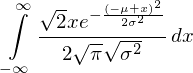

In [5]:
from sympy import Integral, Symbol, exp, oo, pi, sqrt

x = Symbol("x")
mu = Symbol("mu")
sigma = Symbol("sigma")
f = (x / sqrt(2 * pi * sigma**2)) *  exp(-((x - mu)**2) / (2 * sigma**2))
expr = Integral(f, (x, -oo, oo))
expr

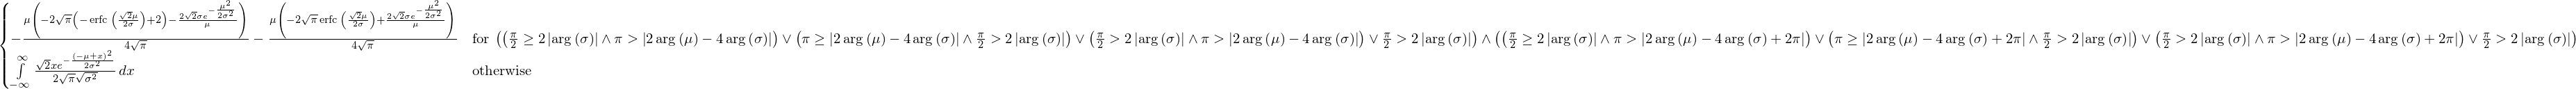

In [6]:
expr.doit()  # What's happen?

In [7]:
x = Symbol("x")
mu = Symbol("mu", real=True)  # mu should be Real 
sigma = Symbol("sigma", real=True, positive=True) # sigma should be Real and Positive value

f = (x / sqrt(2 * pi * sigma**2)) *  exp(-((x - mu)**2) / (2 * sigma**2))
expr = Integral(f, (x, -oo, oo))
expr.doit()  # OK, I expected.

# Expand and Factor

$$ (a + 2b + 3c)^{3} $$

In [8]:
from sympy import Symbol, symbols

a = Symbol("a")
b, c, d = symbols("b, c, d")

expr = (a + 2 * b + 3 * c) ** 3
expr

In [9]:
expanded =  expr.expand()
expanded

In [10]:
expanded.factor()

# Simplify

$$ \sin^{2}\theta + \cos^{2}\theta = 1$$

In [11]:
from sympy import Symbol, cos, simplify, sin

theta = Symbol("theta")
sin(theta)**2 + cos(theta)**2

In [12]:
simplify(sin(theta)**2 + cos(theta)**2)

# Solvers

$$ax^{2} + bx + c = 0$$

In [13]:
from sympy import Eq, simplify, solveset, symbols

x, a, b, c = symbols("x, a, b, c")
eq = Eq(a * x**2 + b * x + c, 0)
eq

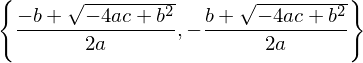

In [14]:
simplify(solveset(eq, x))

# Quintic Equation

$$ax^{5} + bx^{4} + cx^{3} + dx^{2} + ex + f = 0$$

Symmetric group $\mathfrak{S}_{5}$ is non-solvable symmetric group.

In [15]:
from sympy import Eq, simplify, solveset, symbols

x, a, b, c, d, e, f = symbols("x, a, b, c, d, e, f")
eq = Eq(a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f, 0)
simplify(solveset(eq, x))

# Polynomials

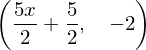

In [16]:
from sympy import Symbol, div

x = Symbol("x")

f = 5 * x**2 + 10 * x + 3
g = 2 * x + 2

div(f, g, domain="QQ") # Polynomial Ring over Q, Q[X] is Euclid domain.

In [17]:
div(f, g, domain="ZZ")  # Polynomial Ring over Z

# Limits

$$\displaystyle \lim_{x \to 0} \frac{\sin{x}}{x}$$

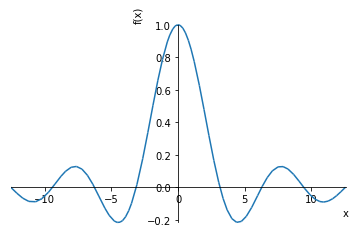

In [18]:
from sympy import Symbol, limit, pi, sin
from sympy.plotting import plot

x = Symbol("x")
f = (sin(x) / x)
plot(f, (x, -4 * pi, 4 * pi))

In [19]:
limit(f, x, 0, "+")

# Derivative

$$ \frac{d}{dx} e^{x}\sin{x} $$

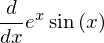

In [20]:
from sympy import Symbol, Derivative, exp, sin

x = Symbol("x")
f = exp(x) * sin(x)
expr = Derivative(f, x)
expr

In [21]:
expr.doit()

# Partial Derivative

$$\frac{\partial^{7}}{\partial z^{4}\partial y^{2}\partial x} e^{x y z}$$

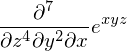

In [22]:
from sympy import Derivative, symbols, exp

x, y, z = symbols("x, y, z")
f = exp(x*y*z)
expr = Derivative(f, x, y, y, z, z, z, z)
expr

In [23]:
expr.doit()

# Taylor Series

\begin{equation}
\sin{x} + \cos{2x} = 1 + x - 2 x^{2} - \frac{x^{3}}{6} + \frac{2 x^{4}}{3} + \frac{x^{5}}{120} - \frac{4 x^{6}}{45} - \frac{x^{7}}{5040} + \frac{2 x^{8}}{315} + \frac{x^{9}}{362880} + O\left(x^{10}\right)
\end{equation}

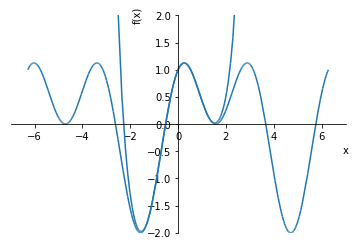

In [24]:
from sympy import Symbol, cos, pi, sin
from sympy.plotting import plot

x = Symbol("x")
f = sin(x) + cos(2 * x)
plot(f, f.series(n=10).removeO(), (x, -2*pi, 2*pi), xlim=(-7, 7), ylim=(-2, 2))

# Integral

$$ \int^{\infty}_{-\infty}\frac{\cos{x}}{x^{2} + 1}dx$$

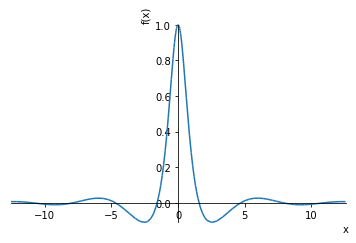

In [25]:
from sympy import Integral, Symbol, cos, oo, pi, simplify, sin
from sympy.plotting import plot

x = Symbol("x")
f = cos(x) / (1 + x**2)
plot(f, (x, -4*pi, 4*pi))

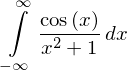

In [26]:
expr = Integral(f, (x, -oo, oo))
expr

In [27]:
simplify(expr.doit())

# Differential Equation of Simple Harmonic Motion

$$ \frac{d^{2}}{dt^{2}} f(t) = - \frac{k}{m}f(t)$$

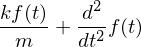

In [28]:
from sympy import Derivative, Function, Symbol, classify_ode, dsolve, symbols

t = Symbol("t")
k, m = symbols("k, m", positive=True)  # k and m should be positive constant
f = Function("f")(t)
expr = Derivative(f, t, 2) + (k / m) * f
expr

In [29]:
classify_ode(expr)

('nth_linear_constant_coeff_homogeneous',)

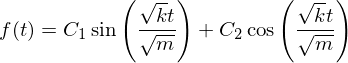

In [30]:
dsolve(expr)

# Vandermonde's Determinant

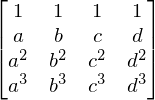

In [31]:
from sympy import Matrix, factor, symbols

a, b, c, d = symbols("a, b, c, d")
A = Matrix([
    [1, 1, 1, 1], 
    [a, b, c, d], 
    [a**2, b**2, c**2, d**2],
    [a**3, b**3, c**3, d**3],
])
A

In [32]:
factor(A.det())

# Characteristic Polynomial

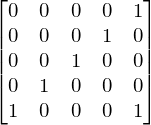

In [33]:
from sympy import Symbol, Matrix, factor, eye, zeros

lamda = Symbol('lamda')

A = Matrix([
    [0, 0, 0, 0, 1], 
    [0, 0, 0, 1, 0], 
    [0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0],
    [1, 0, 0, 0, 1],
])
A

In [34]:
p = A.charpoly(lamda)
factor(p)  # Characteristics Polynomial of A

# Fibonacci Number

$$ \begin{pmatrix}F_{n+1} \\ F_{n}\end{pmatrix} = \begin{pmatrix} 1&1\\ 1 & 0\end{pmatrix}\begin{pmatrix}F_{n} \\ F_{n-1}\end{pmatrix} $$

$$ \begin{pmatrix}F_{n+1} \\ F_{n}\end{pmatrix} = \begin{pmatrix} 1&1\\ 1 & 0\end{pmatrix}^{n}\begin{pmatrix}1 \\0 \end{pmatrix} $$

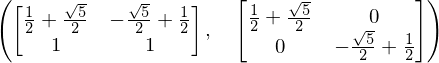

In [35]:
from sympy import Matrix, Symbol, simplify

n = Symbol("n", positive=True, integer=True)

A = Matrix([
    [1, 1],
    [1, 0]
])

F = Matrix([
    [1,],
    [0,]
])

P, D = A.diagonalize()
P, D

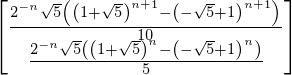

In [36]:
simplify((P * D**n * P**-1) * F)

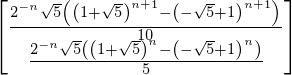

In [37]:
simplify((A**n) * F)

# Bertrand–Chebyshev Theorem

Let $\{p_{n}\} _{n\ge1}$ be a sequence of prime numbers, then $p_{n+1} < 2p_{n}$.

In 1845, Joseph Bertrand himself verified his statement for $2$ to $3 \times 10^{6}$. In 2018, Hayao Suzuki verified this statement for $2$ to $3 \times 10^{6}$ by Shift-Enter!

In [38]:
from itertools import tee
from sympy import sieve

def pairwise(iterable):
    """s -> (s0,s1), (s1,s2), (s2, s3), ..."""
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)


all([p < q < 2 * p for p, q in pairwise(sieve.primerange(1, 3 * (10**6)))])

True

# OK, When do I use SymPy?